In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import harmonypy
import pymn
import scrublet as scr
import gseapy as gp
from gseapy.plot import barplot, dotplot
import bottleneck
import pyreadr
from scipy.io import mmread
import scipy
from sklearn import preprocessing
import random as rd
import scib
from matplotlib_venn import venn2,venn2_circles,venn3
from pyscenic.export import export2loom, add_scenic_metadata
from sklearn.decomposition import NMF
from sklearn import metrics
import palettable
from pyscenic.rss import regulon_specificity_scores
import matplotlib.image as mpimg
import cosg as cosg

import matplotlib as mpl

from pyscenic.utils import modules_from_adjacencies
from IPython.display import display, Image

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
Error: package or namespace load failed for 'methods' in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/public/home/guogjgroup/ggj/anaconda3/envs/R3.6/lib/R/library/methods/libs/methods.so':
  libR.so: cannot open shared object file: No such file or directory
During startup - Warning messages:
1: package 'methods' was built under R version 3.6.3 
2: package "methods" in options("defaultPackages") was not found 
3: package 'datasets' was built under R version 3.6.3 
4: package 'grDevices' was built under R version 3.6.3 
5: package 'graphics' was built under R version 3.6.3 
6: package 'methods' was built under

In [2]:
sc.set_figure_params(dpi = 200, color_map = 'viridis_r' )
sc.settings.verbosity = 2

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


# adata for Seurat (All Cell)

In [8]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

adata_gene = sc.read('/public/home/guogjgroup/ggj/matq_analysis/pan_cancer/cancer_module/cancer_subtyppe_integration_latest/harmony_latest/all_theta_inner_removal6.h5ad')

adata = adata[:, adata_gene.var.index.tolist()]

del adata_gene

adata.write('all_cluster_marker/seurat_marker/dge_for_seurat_all_high_cell.h5ad')

adata.obs[['cancer_type', 'leiden', 'study_id']].to_csv('all_cluster_marker/seurat_marker/dge_for_seurat_all_high_cell.csv')

In [10]:
np.unique(adata.obs['study_id']).tolist()

['BRCA_p1',
 'BRCA_p3',
 'BRCA_p4',
 'COAD_p1',
 'COAD_p2',
 'ESCA_p1',
 'ESCA_p3',
 'HCC_p1',
 'HCC_p2',
 'HCC_p3',
 'HCC_p4',
 'HCC_p5',
 'ICC_p1',
 'ICC_p2',
 'ICC_p4',
 'LUAD_p1',
 'LUAD_p2',
 'LUAD_p3',
 'LUAD_p4',
 'LUAD_p5',
 'LUAD_p6',
 'LUAD_p7',
 'READ_p1',
 'STAD_p1']

# adata for Conserved Marker: Patient Specific Gene

In [100]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')
        
adata.write('all_cluster_marker/patient_specific_gene/patient_specific_gene.h5ad')
adata.obs[['leiden', 'study_id', 'cancer_type']].to_csv('all_cluster_marker/patient_specific_gene/patient_specific_gene.csv')
    

In [103]:
len(np.unique(adata.obs['study_id']).tolist())

24

In [106]:
np.unique(adata.obs['study_id']).tolist()

['BRCA_p1',
 'BRCA_p3',
 'BRCA_p4',
 'COAD_p1',
 'COAD_p2',
 'ESCA_p1',
 'ESCA_p3',
 'HCC_p1',
 'HCC_p2',
 'HCC_p3',
 'HCC_p4',
 'HCC_p5',
 'ICC_p1',
 'ICC_p2',
 'ICC_p4',
 'LUAD_p1',
 'LUAD_p2',
 'LUAD_p3',
 'LUAD_p4',
 'LUAD_p5',
 'LUAD_p6',
 'LUAD_p7',
 'READ_p1',
 'STAD_p1']

# Conserved Marker: Patient Specific Gene

In [32]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata)

adata.obs['leiden'] = adata.obs['leiden'].astype(str)
adata.obs['cancer_type'] = adata.obs['cancer_type'].astype(str)
adata.obs['study_id'] = adata.obs['study_id'].astype(str)

adata.obs['leiden_cancer'] = adata.obs['leiden'] + '_' + adata.obs['cancer_type']
adata.obs['leiden_patient'] = adata.obs['leiden'] + '_' + adata.obs['study_id']

adata.obs['cancer_leiden'] = adata.obs['cancer_type'] + '_' + adata.obs['leiden']
adata.obs['patient_leiden'] = adata.obs['study_id'] + '_' + adata.obs['leiden']

patient_list = np.unique(adata.obs['study_id']).tolist()
patient_list.remove('ICC_p4')

normalizing counts per cell
    finished (0:00:02)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [33]:
patient_list

['BRCA_p1',
 'BRCA_p3',
 'BRCA_p4',
 'COAD_p1',
 'COAD_p2',
 'ESCA_p1',
 'ESCA_p3',
 'HCC_p1',
 'HCC_p2',
 'HCC_p3',
 'HCC_p4',
 'HCC_p5',
 'ICC_p1',
 'ICC_p2',
 'LUAD_p1',
 'LUAD_p2',
 'LUAD_p3',
 'LUAD_p4',
 'LUAD_p5',
 'LUAD_p6',
 'LUAD_p7',
 'READ_p1',
 'STAD_p1']

In [34]:
p_val_cutoff = 0.05
avg_log2FC_cutoff = 0.5
pct_1_cutoff = 0.25
pct_difference_cutoff = 0.1

all_patient_gene = pd.DataFrame()

marker_dict = {}
marker_dict_top = {}
marker_dict_last = {}

for each_patient in patient_list:

    each_tissue_marker = pd.read_csv('all_cluster_marker/patient_specific_gene/' + each_patient + '_conserved_markers.csv', index_col=0)

    if 'minimump_p_val' in each_tissue_marker.columns.tolist():

        each_tissue_marker[each_tissue_marker['minimump_p_val'] < p_val_cutoff]

#        for each_column in [s for s in each_tissue_marker.columns.tolist() if '_p_val_adj' in s]:

#            each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] < p_val_cutoff]

        for each_column in [s for s in each_tissue_marker.columns.tolist() if '_avg_log2FC' in s]:

            each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] > avg_log2FC_cutoff]

        for each_column in [s for s in each_tissue_marker.columns.tolist() if '_pct.1' in s]:

            each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] > pct_1_cutoff]

        for each_column in [s for s in each_tissue_marker.columns.tolist() if '_pct.1' in s]:

            selected_cluster = '_'.join(each_column.split('_')[:-1])

            for each_gene in each_tissue_marker.index.tolist():

                if each_tissue_marker.loc[each_gene, selected_cluster + '_pct.1'] - each_tissue_marker.loc[each_gene, selected_cluster + '_pct.2'] < pct_difference_cutoff:

                    each_tissue_marker = each_tissue_marker.drop(each_gene)        

        each_tissue_marker['patient'] = each_patient

        all_patient_gene = pd.concat([all_patient_gene, each_tissue_marker], axis=0)

        marker_dict[each_patient] = each_tissue_marker.index.tolist()
        marker_dict_top[each_patient] = each_tissue_marker[:5].index.tolist()
        marker_dict_last[each_patient] = each_tissue_marker[-5:].index.tolist()

all_patient_gene.to_csv('all_cluster_marker/patient_specific_gene/patient_specific_gene_latest.csv')

In [35]:
all_patient_gene['patient'].value_counts()

HCC_p4     178
ICC_p2     124
ESCA_p1     94
ESCA_p3     94
BRCA_p3     76
LUAD_p5     67
COAD_p1     59
HCC_p2      57
STAD_p1     43
LUAD_p7     41
HCC_p1      39
LUAD_p4     39
COAD_p2     37
BRCA_p1     30
HCC_p3      24
BRCA_p4     19
LUAD_p6     18
LUAD_p1     15
READ_p1     12
ICC_p1      11
LUAD_p3      8
HCC_p5       8
LUAD_p2      1
Name: patient, dtype: int64

In [36]:
sc.pl.heatmap(adata, marker_dict, groupby='study_id', show=False, use_raw=False,
              vmin=-2, vmax=2, cmap='coolwarm', figsize=[6, 12],
              save='_patient_specific_gene.png')

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


{'heatmap_ax': <AxesSubplot:>,
 'groupby_ax': <AxesSubplot:ylabel='study_id'>,
 'gene_groups_ax': <AxesSubplot:>}

# adata for Conserved Marker: Tissue Specific Gene (Each Patient)

In [295]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

adata.obs['tissue'] = adata.obs['sample'].str.split('_', expand=True)[2]
adata.obs['tissue'] = adata.obs['tissue'].astype(str)

for each_patient in np.unique(adata.obs['study_id']).tolist():
    
    each_adata = adata[adata.obs['study_id'] == each_patient].copy()
    
    if len(np.unique(each_adata.obs['tissue']).tolist()) > 1:
        
        for each_cluster in np.unique(each_adata.obs['leiden']).tolist():
                        
            if (each_adata[(each_adata.obs['leiden'] == each_cluster) & (each_adata.obs['tissue'] == 'NAT')].shape[0] < 3) or (each_adata[(each_adata.obs['leiden'] == each_cluster) & (each_adata.obs['tissue'] == 'tumor')].shape[0] < 3):
                
                each_adata = each_adata[each_adata.obs['leiden'] != each_cluster]
        
        each_adata.write('all_cluster_marker/tissue_specific_gene/' + each_patient + '.h5ad')
        each_adata.obs[['leiden', 'tissue']].to_csv('all_cluster_marker/tissue_specific_gene/' + each_patient + '.csv')

In [207]:
each_adata = adata[adata.obs['study_id'] == 'COAD_p1'].copy()

for each_cluster in np.unique(each_adata.obs['leiden']).tolist():
    
    print(each_adata[(each_adata.obs['leiden'] == each_cluster) & (each_adata.obs['tissue'] == 'metastasis')].shape[0])

3578
24
78
25
119
53
1704
818
1193
518
133


# Conserved Marker: Tissue Specific Gene

In [37]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

adata.obs['tissue'] = adata.obs['sample'].str.split('_', expand=True)[2]
adata.obs['tissue'] = adata.obs['tissue'].astype(str)

patient_list = []

for each_patient in np.unique(adata.obs['study_id']).tolist():
    
    each_adata = adata[adata.obs['study_id'] == each_patient].copy()
    
    if len(np.unique(each_adata.obs['tissue']).tolist()) > 1:
        
        patient_list.append(each_patient)
        
patient_list.remove('HCC_p3')

In [38]:
len(patient_list)

19

In [39]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

adata.obs['tissue'] = adata.obs['sample'].str.split('_', expand=True)[2]
adata.obs['tissue'] = adata.obs['tissue'].astype(str)

adata.obs['leiden'] = adata.obs['leiden'].astype(str)
adata.obs['study_id'] = adata.obs['study_id'].astype(str)

adata.obs['leiden_tissue'] = adata.obs['leiden'] + '_' + adata.obs['tissue']
adata.obs['tissue_leiden'] = adata.obs['tissue'] + '_' + adata.obs['leiden']

In [40]:
p_val_cutoff = 0.05
avg_log2FC_cutoff = 0.5
pct_1_cutoff = 0.25
pct_difference_cutoff = 0.1

all_patient_gene = pd.DataFrame()

for each_patient in patient_list:
    
    marker_dict = {}
    marker_dict_top = {}
    marker_dict_last = {}
    
    for each_tissue in np.unique(adata[adata.obs['study_id'] == each_patient].obs['tissue']).tolist():
    
        each_tissue_marker = pd.read_csv('all_cluster_marker/tissue_specific_gene/' + each_patient + '_' + each_tissue + '_conserved_markers.csv', index_col=0)

        if 'minimump_p_val' in each_tissue_marker.columns.tolist():

            each_tissue_marker[each_tissue_marker['minimump_p_val'] < p_val_cutoff]

#            for each_column in [s for s in each_tissue_marker.columns.tolist() if '_p_val_adj' in s]:

#                each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] < p_val_cutoff]

            for each_column in [s for s in each_tissue_marker.columns.tolist() if '_avg_log2FC' in s]:

                each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] > avg_log2FC_cutoff]

            for each_column in [s for s in each_tissue_marker.columns.tolist() if '_pct.1' in s]:

                each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] > pct_1_cutoff]

            for each_column in [s for s in each_tissue_marker.columns.tolist() if '_pct.1' in s]:

                selected_cluster = '_'.join(each_column.split('_')[:-1])

                for each_gene in each_tissue_marker.index.tolist():

                    if each_tissue_marker.loc[each_gene, selected_cluster + '_pct.1'] - each_tissue_marker.loc[each_gene, selected_cluster + '_pct.2'] < pct_difference_cutoff:

                        each_tissue_marker = each_tissue_marker.drop(each_gene)        

            each_tissue_marker['patient'] = each_patient
            each_tissue_marker['tissue'] = each_tissue

            all_patient_gene = pd.concat([all_patient_gene, each_tissue_marker], axis=0)

            marker_dict[each_tissue] = each_tissue_marker.index.tolist()
            marker_dict_top[each_tissue] = each_tissue_marker[:10].index.tolist()
            marker_dict_last[each_tissue] = each_tissue_marker[-10:].index.tolist()
         
    adata_subset = adata[adata.obs['study_id'] == each_patient].copy()
    
#    for each_cluster in np.unique(adata_subset.obs['leiden']).tolist():
                        
#        if (adata_subset[(adata_subset.obs['leiden'] == each_cluster) & (adata_subset.obs['tissue'] == 'NAT')].shape[0] < 3) or (adata_subset[(adata_subset.obs['leiden'] == each_cluster) & (adata_subset.obs['tissue'] == 'tumor')].shape[0] < 3):
                
#            adata_subset = adata_subset[adata_subset.obs['leiden'] != each_cluster]

    sc.pp.normalize_total(adata_subset)
    sc.pp.log1p(adata_subset)
    sc.pp.scale(adata_subset)
    
    if marker_dict != {}:
        
        sc.pl.heatmap(adata_subset, marker_dict, groupby='tissue', show=False, use_raw=False,
                      vmin=-2, vmax=2, cmap='coolwarm', figsize=[6, 6],
                      save='_' + each_patient + '_tissue_specific_gene.png')
    
#        sc.pl.dotplot(adata_subset, marker_dict_top, groupby='tissue_leiden', use_raw=False, 
#                      vmin=-2, vmax=2, cmap='coolwarm', title=each_patient)
#        sc.pl.dotplot(adata_subset, marker_dict_last, groupby='tissue_leiden', use_raw=False, 
#                      vmin=-2, vmax=2, cmap='coolwarm', title=each_patient)

all_patient_gene.to_csv('all_cluster_marker/tissue_specific_gene/tissue_specific_gene_latest.csv')

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:1171: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im = heatmap_ax.imshow(obs_tidy.values, aspect='auto', norm=norm, **kwds)
/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:1174: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  heatmap_ax.set_xlim(-0.5, obs_tidy.shape[1] - 0.5)
/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:1171: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  im = heatmap_ax.imshow(obs_tidy.values, aspect='auto', norm=norm, **kwds)
/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:1174: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  heatmap_ax.set_xlim(-0.5, obs_tidy.shape[1] - 0.5)
/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


# DEG: Each Cancer

# adata for Conserved Marker: Patient Specific Gene within Each Cancer

In [115]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')
        
for each_cancer in np.unique(adata.obs['cancer_type']).tolist():
    
    each_cancer_adata = adata[adata.obs['cancer_type'] == each_cancer].copy()
    
    for each_patient in np.unique(each_cancer_adata.obs['study_id']).tolist():
        
        each_patient_adata = each_cancer_adata.copy()
        
        for each_cluster in np.unique(each_patient_adata[each_patient_adata.obs['study_id'] == each_patient].obs['leiden']).tolist():
                        
            if (each_patient_adata[(each_patient_adata.obs['leiden'] == each_cluster) & (each_patient_adata.obs['study_id'] == each_patient)].shape[0] < 3) or (each_patient_adata[(each_patient_adata.obs['leiden'] == each_cluster) & (each_patient_adata.obs['study_id'] != each_patient)].shape[0] < 3):
                
                each_patient_adata = each_patient_adata[each_patient_adata.obs['leiden'] != each_cluster]
        
        if len(np.unique(each_patient_adata.obs['leiden']).tolist()) > 1:
    
            each_patient_adata.write('patient_specific_gene_within_cancer/' + each_patient + '_patient_specific_gene_within_cancer.h5ad')
            each_patient_adata.obs[['leiden', 'study_id']].to_csv('patient_specific_gene_within_cancer/' + each_patient + '_patient_specific_gene_within_cancer.csv')
    

In [150]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

for each_cancer in np.unique(adata.obs['cancer_type']).tolist():
    
    each_cancer_adata = adata[adata.obs['cancer_type'] == each_cancer].copy()
    
    for each_patient in np.unique(each_cancer_adata.obs['study_id']).tolist():
        
        each_patient_adata = each_cancer_adata.copy()
        
        for each_cluster in np.unique(each_patient_adata[each_patient_adata.obs['study_id'] == each_patient].obs['leiden']).tolist():
                        
            if (each_patient_adata[(each_patient_adata.obs['leiden'] == each_cluster) & (each_patient_adata.obs['study_id'] == each_patient)].shape[0] < 3) or (each_patient_adata[(each_patient_adata.obs['leiden'] == each_cluster) & (each_patient_adata.obs['study_id'] != each_patient)].shape[0] < 3):
                
                each_patient_adata = each_patient_adata[each_patient_adata.obs['leiden'] != each_cluster]
        
        if len(np.unique(each_patient_adata.obs['leiden']).tolist()) > 1:
    
            print('\'' + each_patient + '\'' + ', ')

'BRCA_p1', 
'BRCA_p3', 
'BRCA_p4', 
'COAD_p1', 
'COAD_p2', 
'READ_p1', 
'ESCA_p1', 
'ESCA_p3', 
'HCC_p1', 
'HCC_p2', 
'HCC_p3', 
'HCC_p4', 
'HCC_p5', 
'ICC_p1', 
'ICC_p2', 
'ICC_p4', 
'LUAD_p1', 
'LUAD_p2', 
'LUAD_p3', 
'LUAD_p4', 
'LUAD_p5', 
'LUAD_p6', 
'LUAD_p7', 


In [34]:
patient_list = ['BRCA_p1', 'BRCA_p3', 'BRCA_p4', 'COAD_p1', 'COAD_p2', 'READ_p1', 'ESCA_p1', 'ESCA_p3', 
                'HCC_p1', 'HCC_p2', 'HCC_p3', 'HCC_p4', 'HCC_p5', 'ICC_p1', 'ICC_p2', 'ICC_p4', 
                'LUAD_p1', 'LUAD_p2', 'LUAD_p3', 'LUAD_p4', 'LUAD_p5', 'LUAD_p6', 'LUAD_p7']

In [28]:
p_val_cutoff = 0.05
avg_log2FC_cutoff = 0.5
pct_1_cutoff = 0.25
pct_difference_cutoff = 0.1

all_patient_gene = pd.DataFrame()

adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

for each_cancer in np.unique(adata.obs['cancer_type']).tolist():
    
    each_cancer_adata = adata[adata.obs['cancer_type'] == each_cancer].copy()
    
    sc.pp.normalize_total(each_cancer_adata)
    sc.pp.log1p(each_cancer_adata)
    sc.pp.scale(each_cancer_adata)
    
    marker_dict = {}
    marker_dict_top = {}
    marker_dict_last = {}
    
    for each_patient in np.unique(each_cancer_adata.obs['study_id']).tolist():
        
        if each_patient in patient_list:
                
            each_tissue_marker = pd.read_csv('patient_specific_gene_within_cancer/' + each_patient + '_within_cancer_conserved_markers.csv', index_col=0)

            if 'minimump_p_val' in each_tissue_marker.columns.tolist():

                each_tissue_marker[each_tissue_marker['minimump_p_val'] < p_val_cutoff]

    #            for each_column in [s for s in each_tissue_marker.columns.tolist() if '_p_val_adj' in s]:

    #                each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] < p_val_cutoff]

                for each_column in [s for s in each_tissue_marker.columns.tolist() if '_avg_log2FC' in s]:

                    each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] > avg_log2FC_cutoff]

                for each_column in [s for s in each_tissue_marker.columns.tolist() if '_pct.1' in s]:

                    each_tissue_marker = each_tissue_marker[each_tissue_marker[each_column] > pct_1_cutoff]

                for each_column in [s for s in each_tissue_marker.columns.tolist() if '_pct.1' in s]:

                    selected_cluster = '_'.join(each_column.split('_')[:-1])

                    for each_gene in each_tissue_marker.index.tolist():

                        if each_tissue_marker.loc[each_gene, selected_cluster + '_pct.1'] - each_tissue_marker.loc[each_gene, selected_cluster + '_pct.2'] < pct_difference_cutoff:

                            each_tissue_marker = each_tissue_marker.drop(each_gene)        

                each_tissue_marker['patient'] = each_patient
                each_tissue_marker['cancer_type'] = each_cancer

                all_patient_gene = pd.concat([all_patient_gene, each_tissue_marker], axis=0)

                marker_dict[each_patient] = each_tissue_marker.index.tolist()
                marker_dict_top[each_patient] = each_tissue_marker[:10].index.tolist()
                marker_dict_last[each_patient] = each_tissue_marker[-10:].index.tolist()
         
    if marker_dict != {}:
        
        sc.pl.heatmap(each_cancer_adata, marker_dict, groupby='study_id', show=False, use_raw=False,
                      vmin=-2, vmax=2, cmap='coolwarm', figsize=[6, 6],
                      save='_' + each_cancer + '_patient_specific_gene_within_cancer.png')
    
#        sc.pl.dotplot(each_cancer_adata, marker_dict_top, groupby='tissue_leiden', use_raw=False, 
#                      vmin=-2, vmax=2, cmap='coolwarm', title=each_patient)
#        sc.pl.dotplot(each_cancer_adata, marker_dict_last, groupby='tissue_leiden', use_raw=False, 
#                      vmin=-2, vmax=2, cmap='coolwarm', title=each_patient)

all_patient_gene.to_csv('patient_specific_gene_within_cancer/patient_specific_gene_within_cancer_latest.csv')

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:2503: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(mappable, cax=heatmap_cbar_ax)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [14]:
adata = sc.read('cnv_high_epi_harmony_anno_latest.h5ad')

adata.obs['leiden'] = adata.obs['leiden'].astype(str)
adata.obs['study_id'] = adata.obs['study_id'].astype(str)
adata.obs['tissue'] = adata.obs['sample'].str.split('_', expand=True)[2]
adata.obs['tissue'] = adata.obs['tissue'].astype(str)

adata.obs['leiden_patient_tissue'] = adata.obs['leiden'] + '_' + adata.obs['study_id'] + '_' + adata.obs['tissue']


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


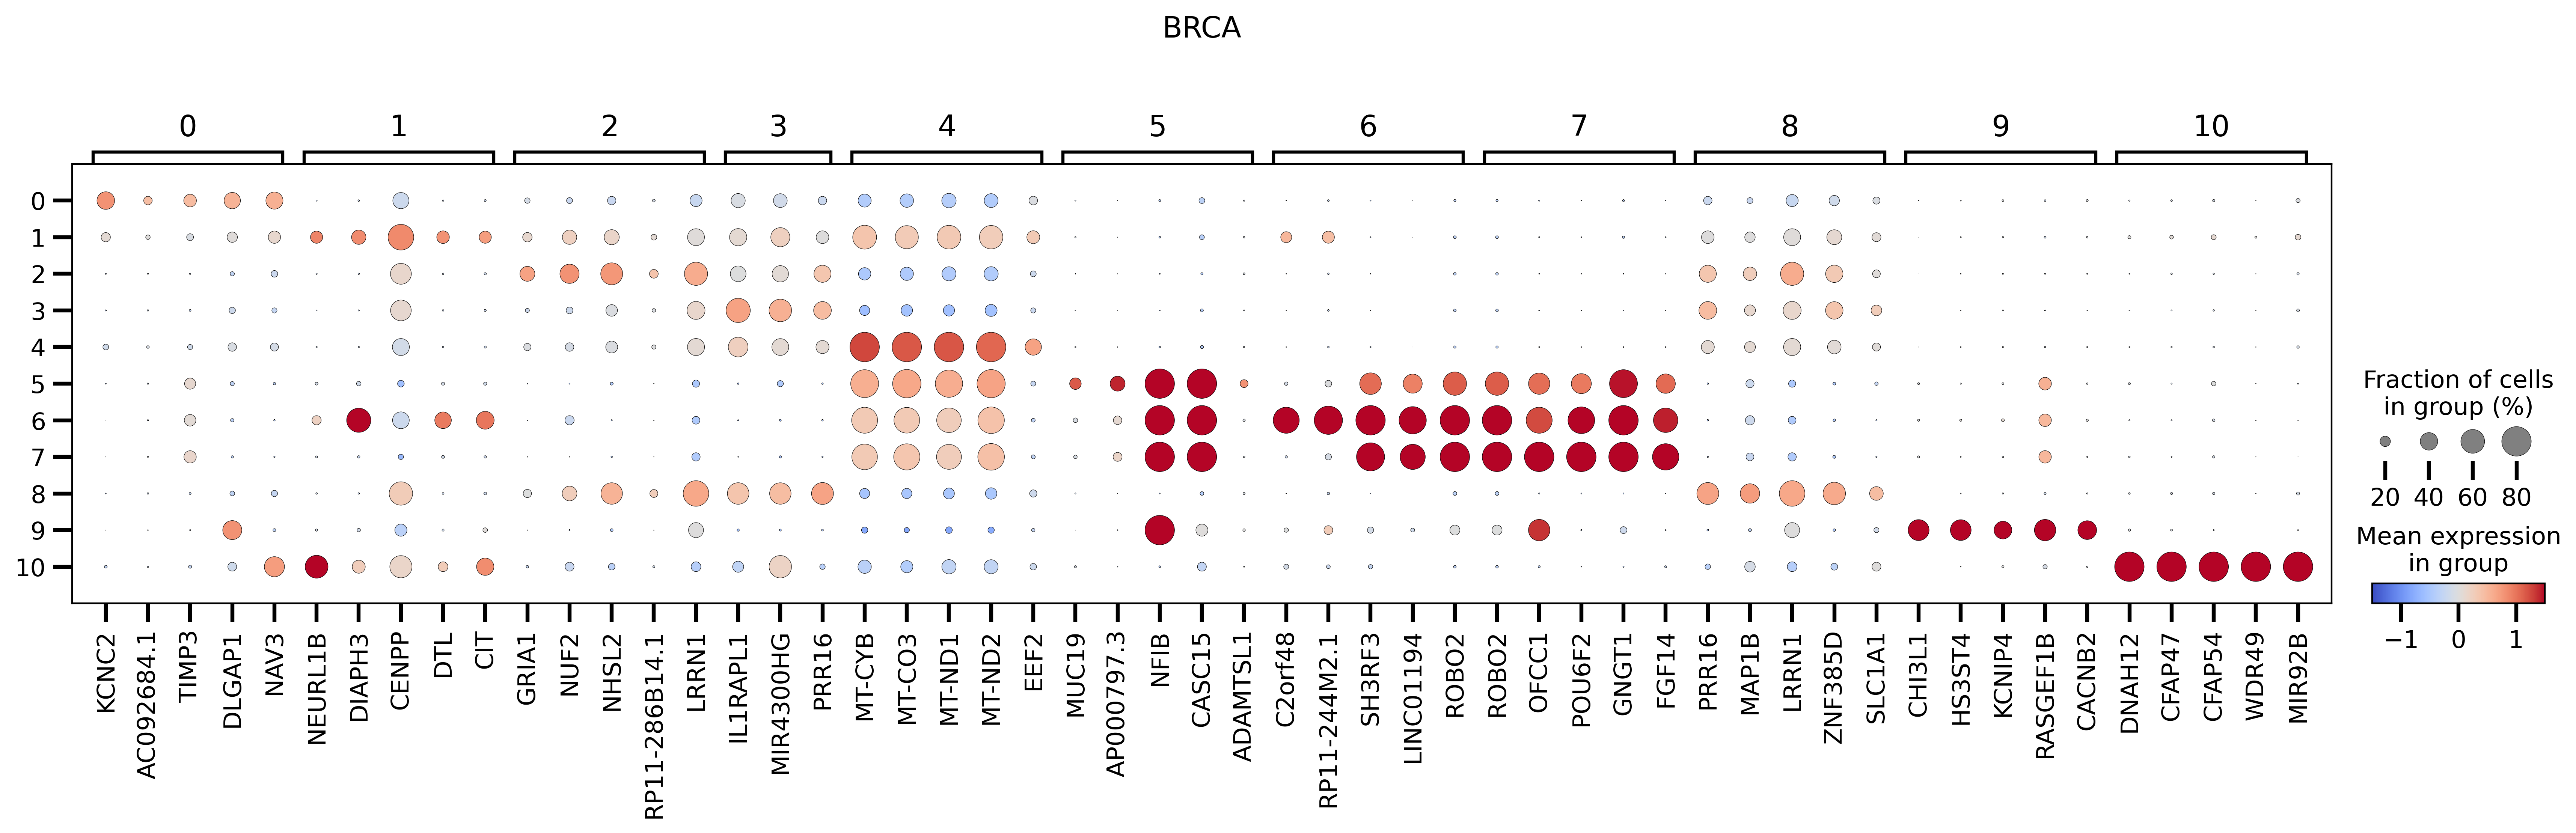

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


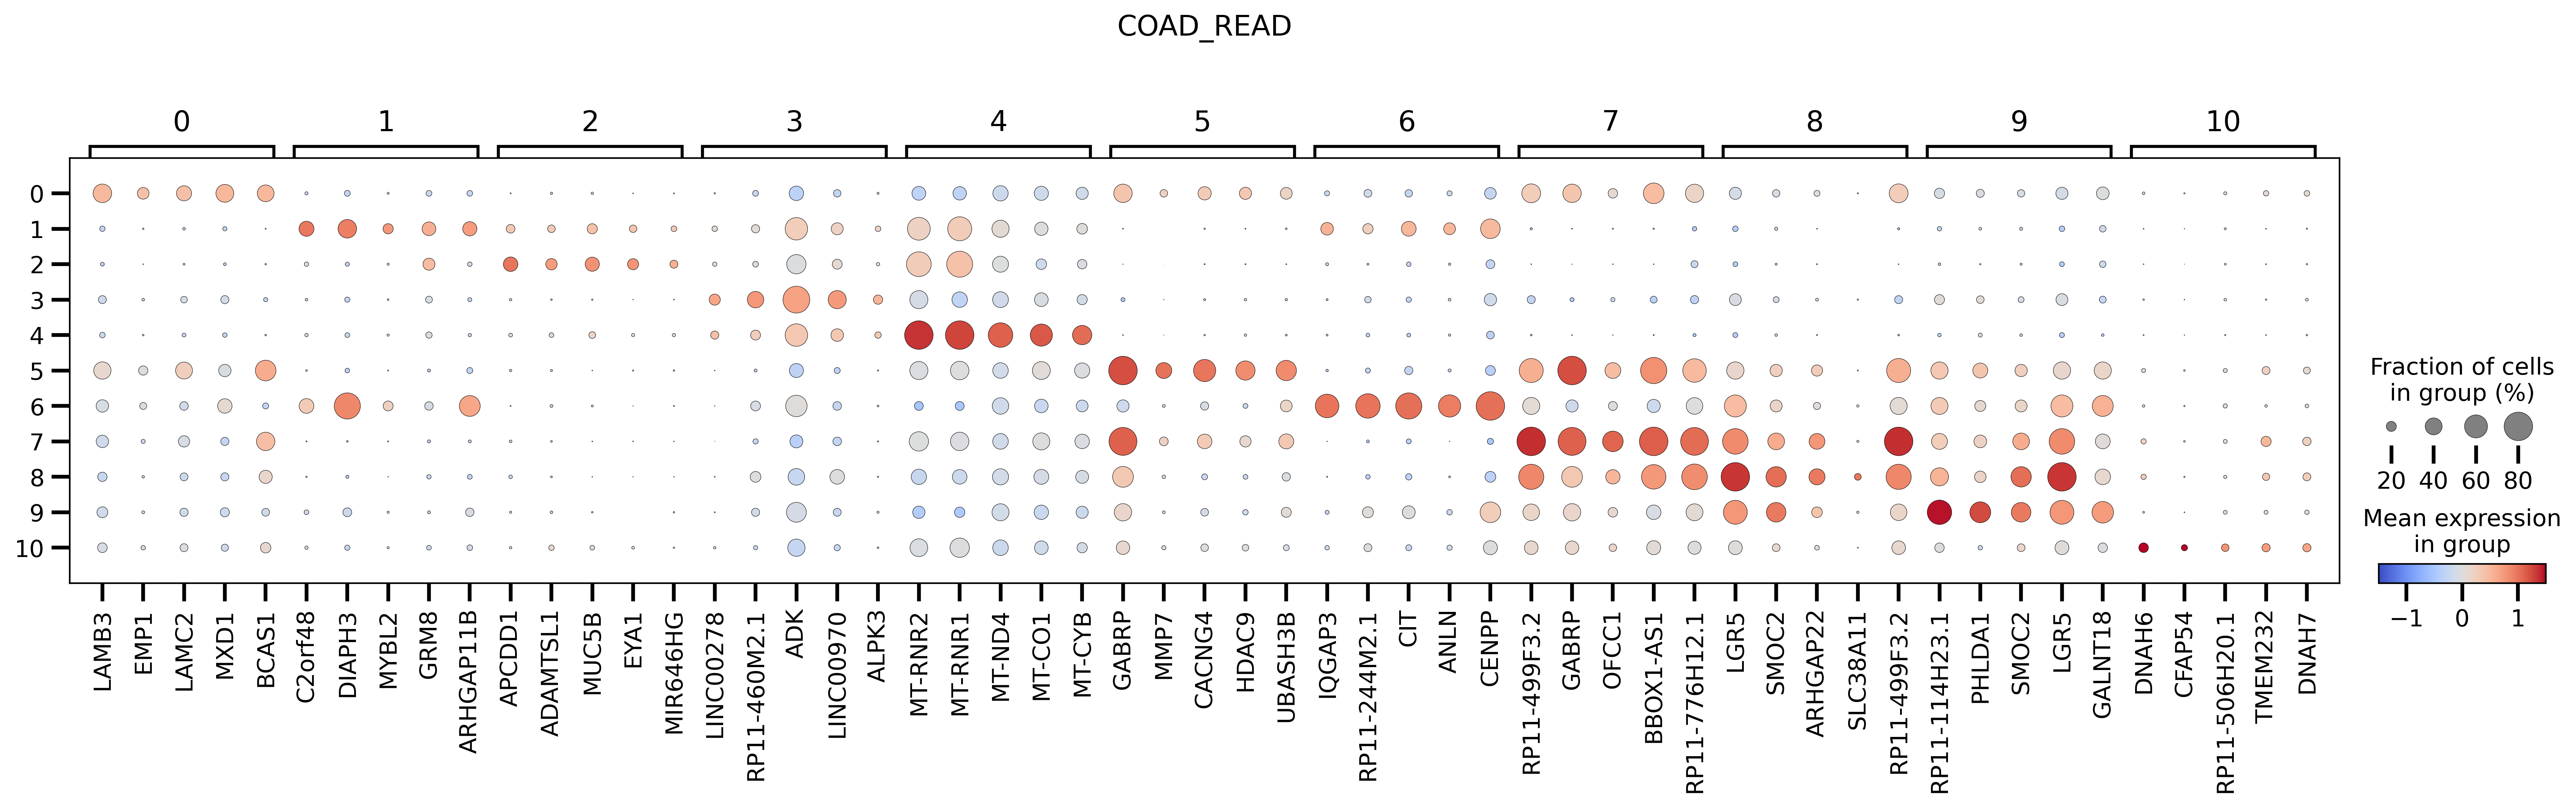

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


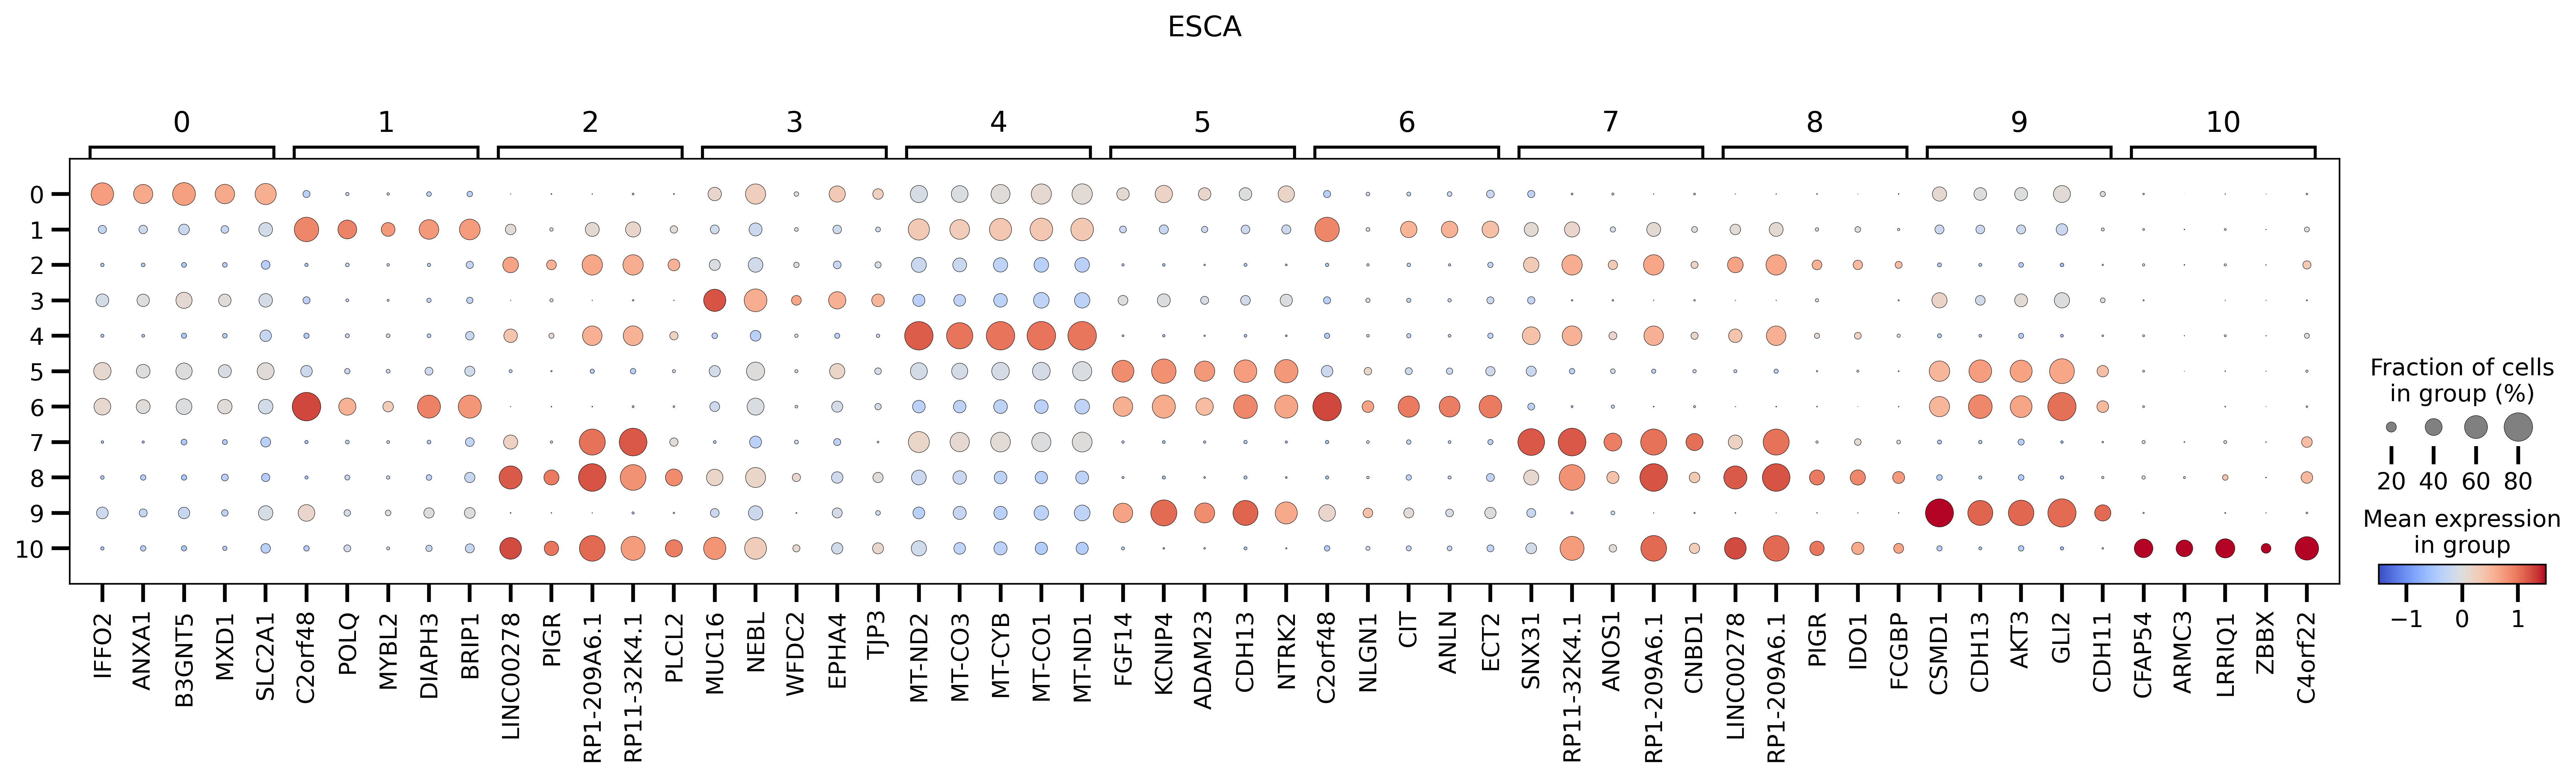

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


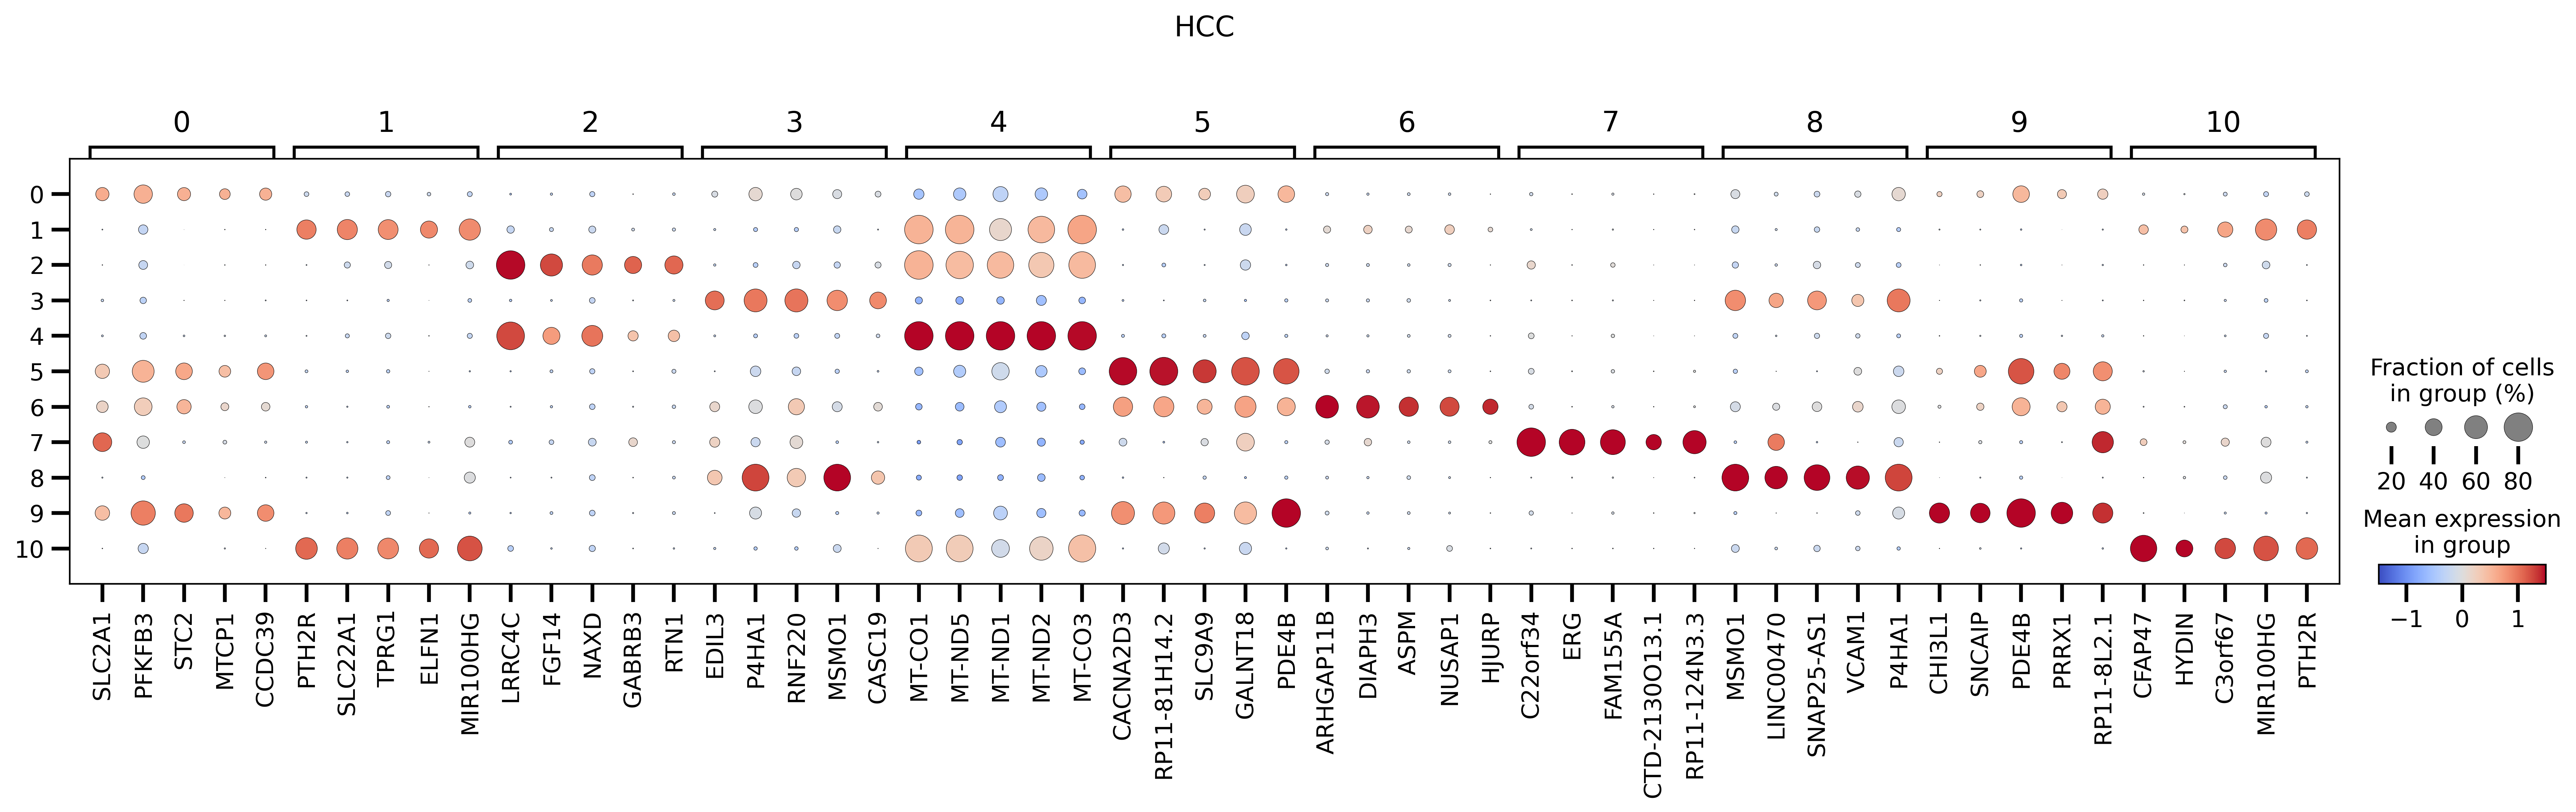

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


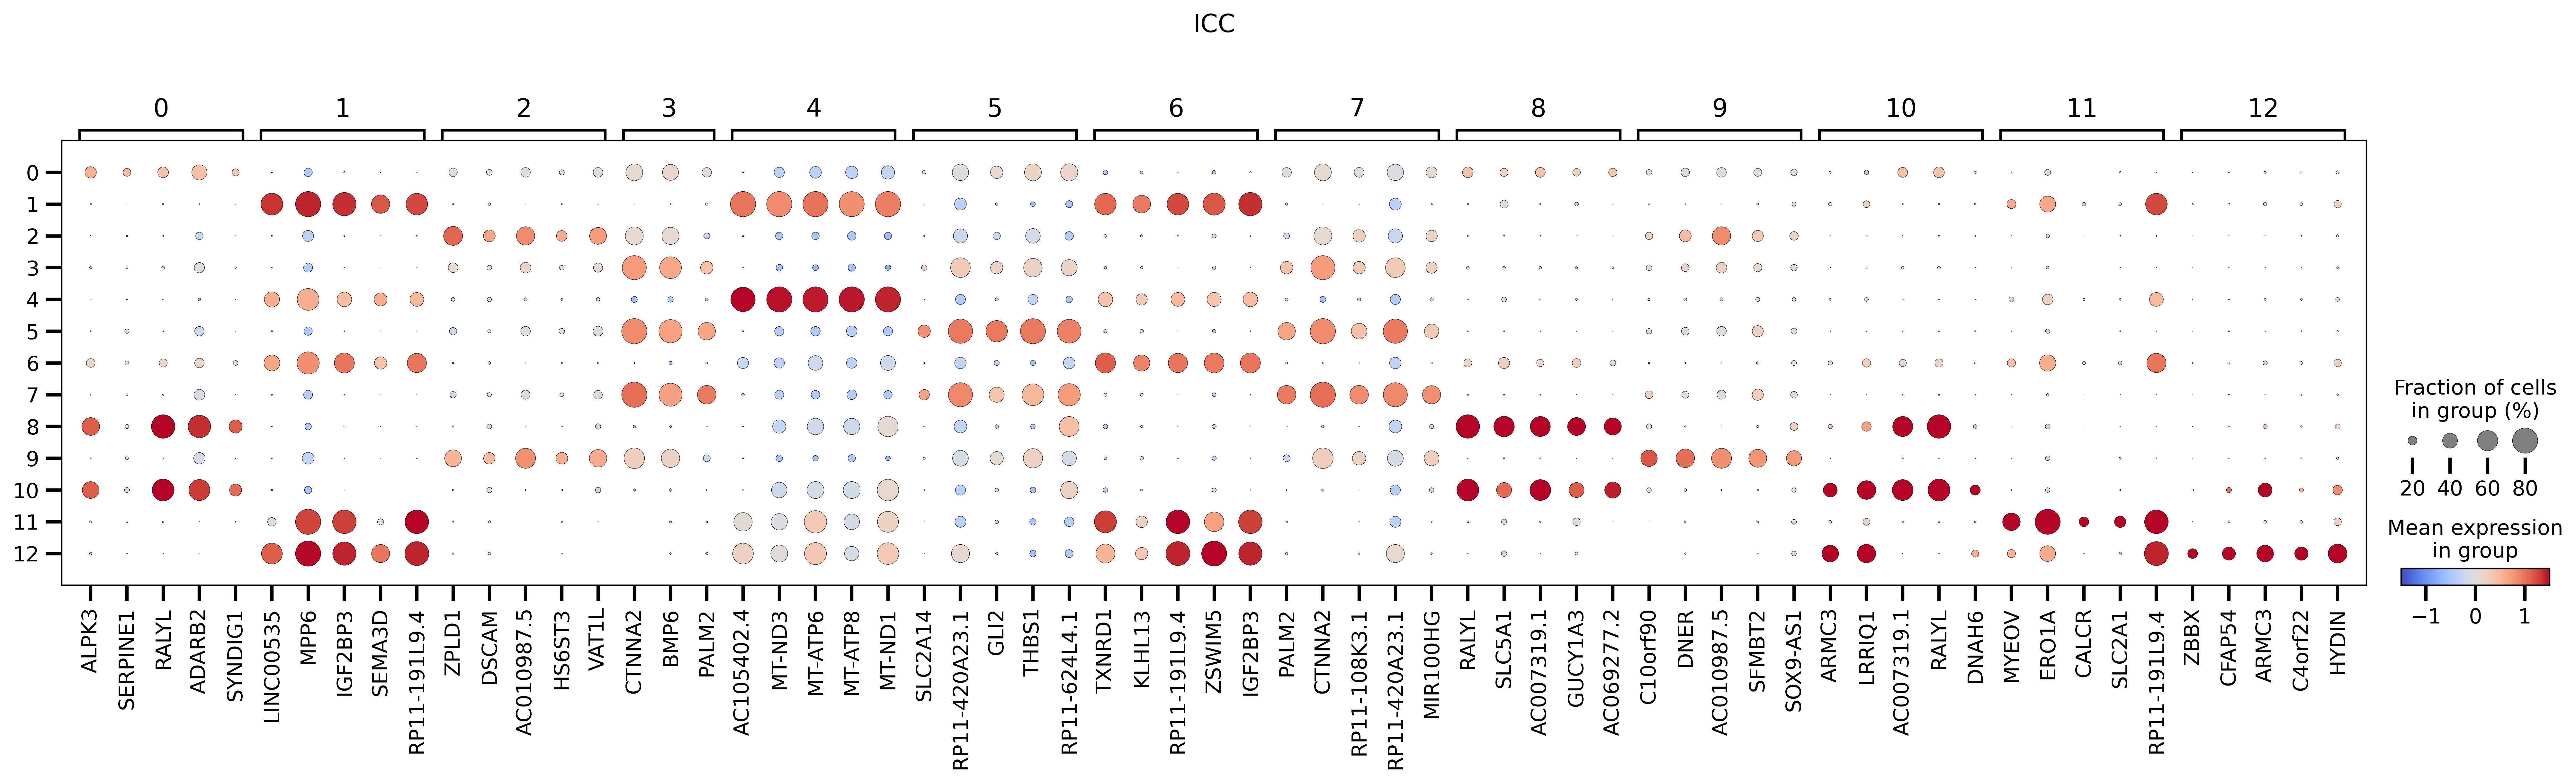

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


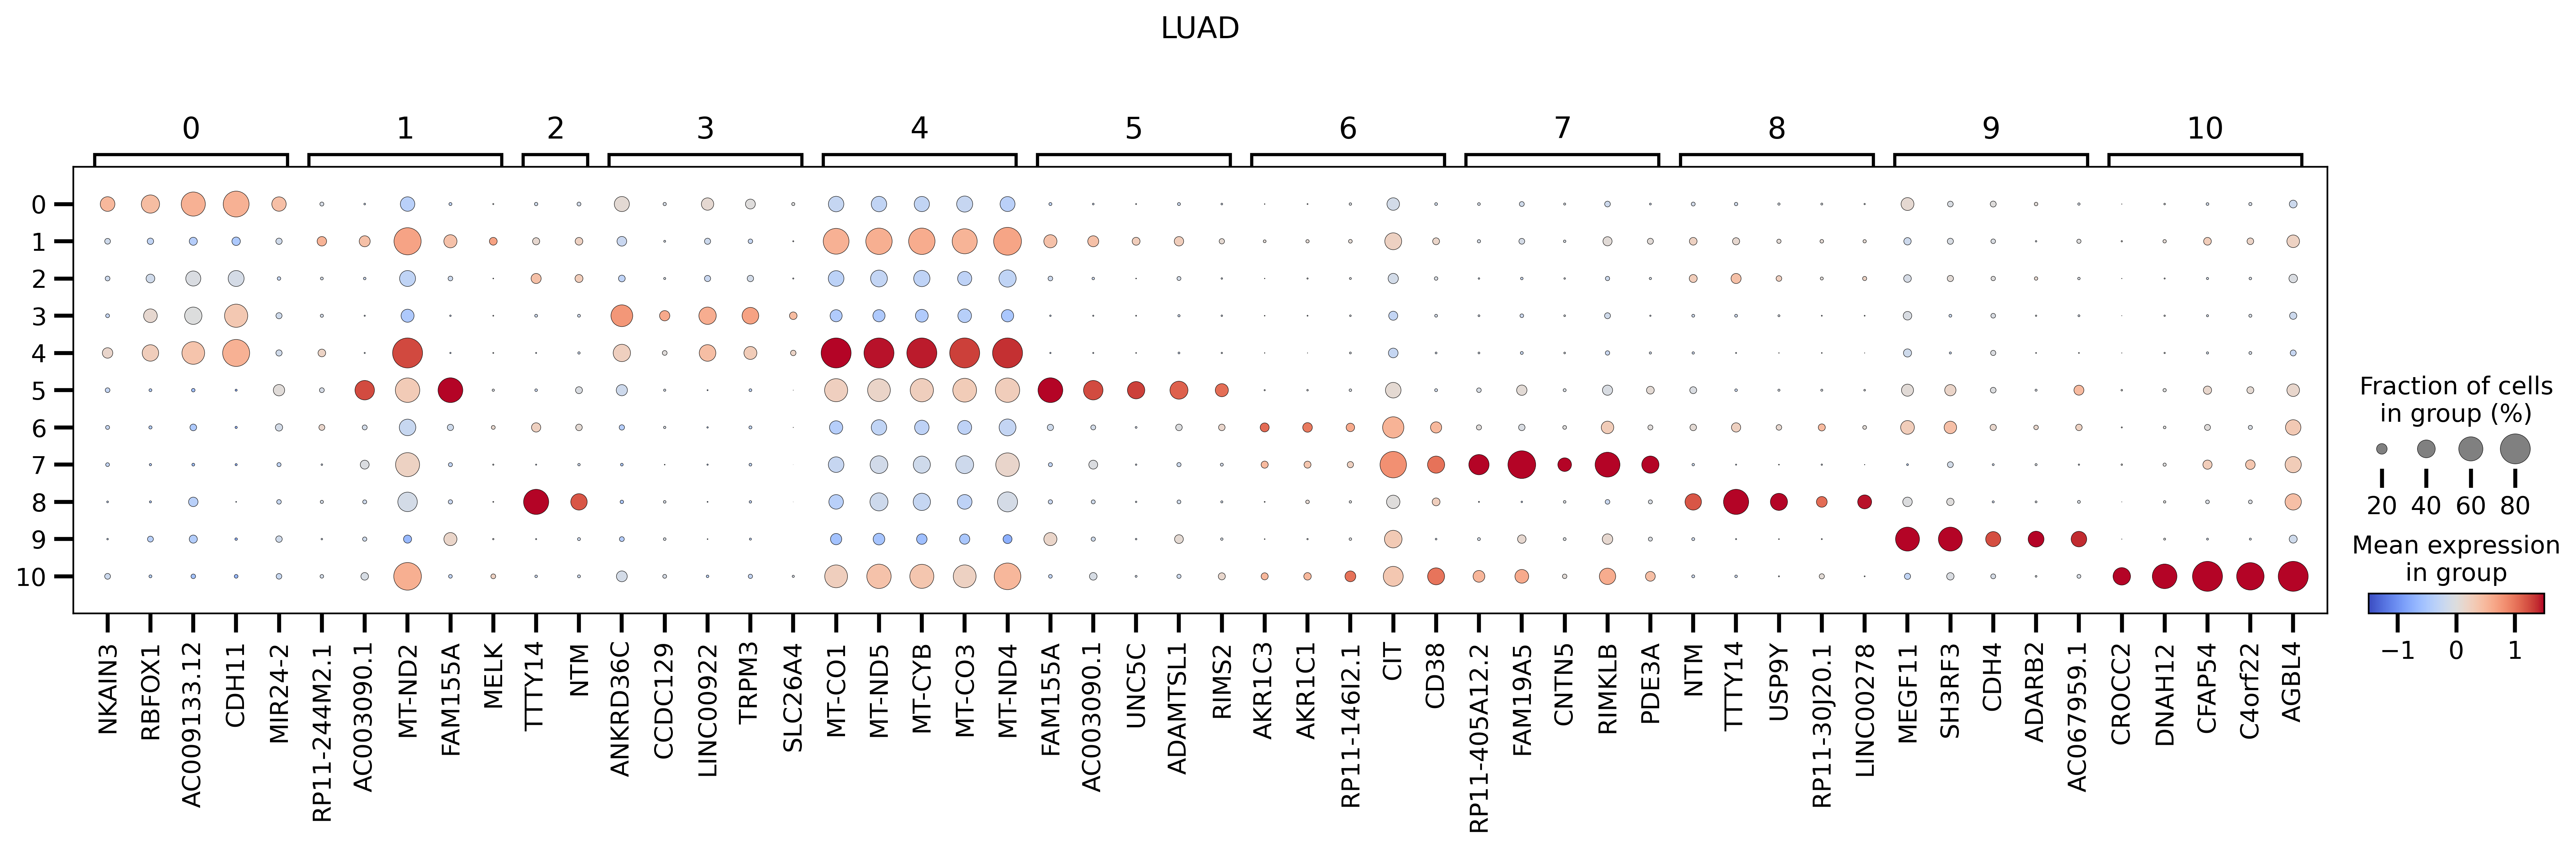

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_baseplot_class.py:510: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matplotlib.colorbar.ColorbarBase(


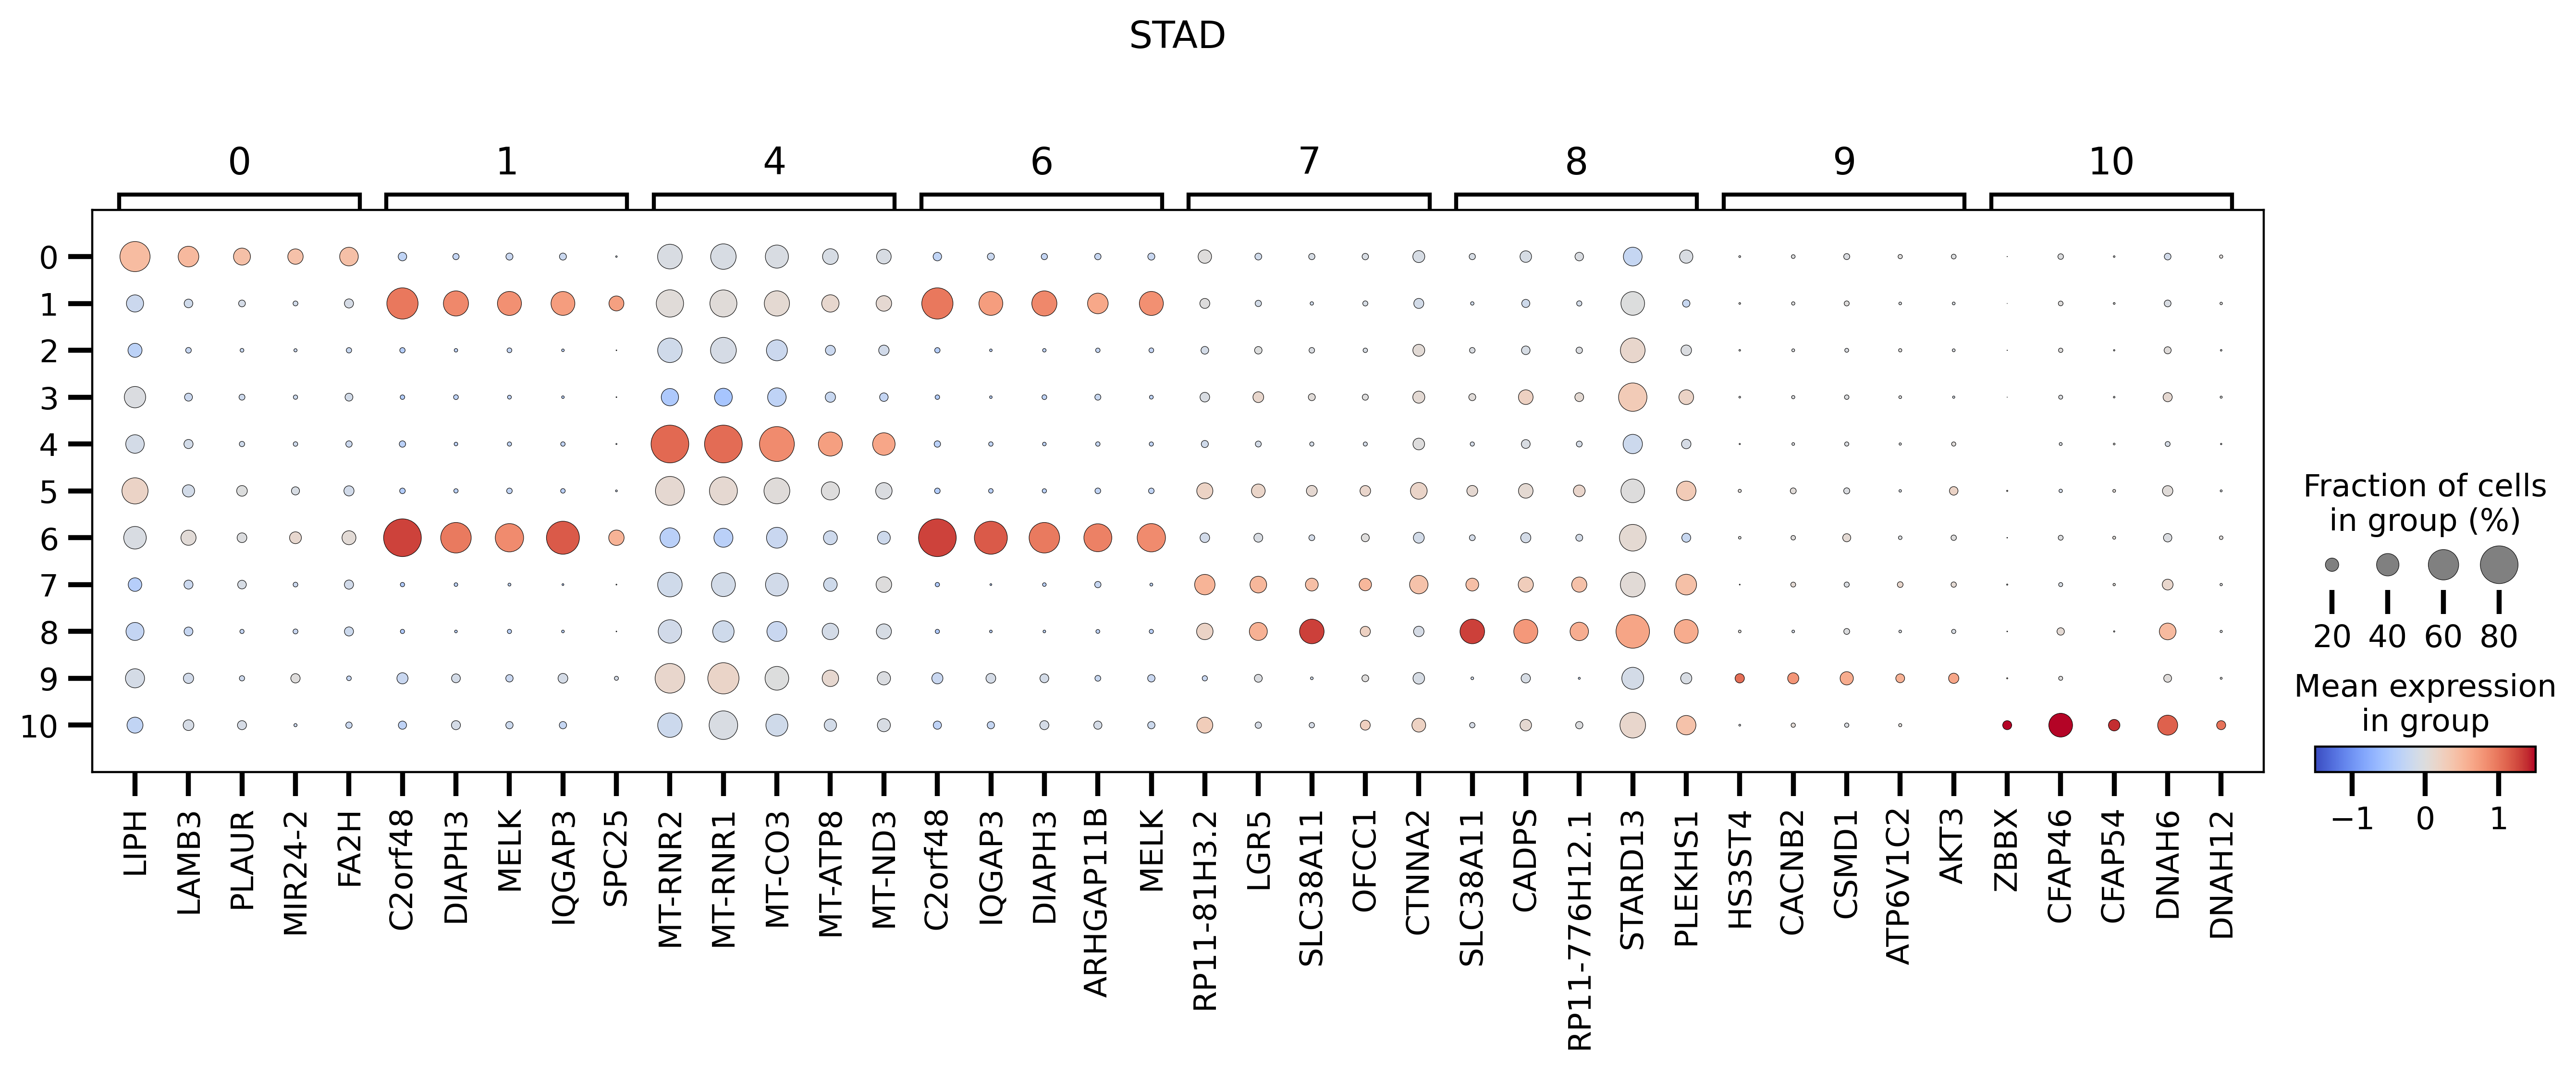

In [17]:
#pts_cutoff = 0.25
pts_cutoff = 0.1
p_cutoff = 0.01
#logFC_cutoff = 0.5
logFC_cutoff = 1
#pts_change_cutoff = 0.1
pts_change_cutoff = 0

each_cancer_marker = pd.DataFrame()

for each_cancer in np.unique(adata.obs['cancer_type']).tolist():
    
    adata_subset = adata[adata.obs['cancer_type'] == each_cancer].copy()

    sc.pp.normalize_total(adata_subset)
    sc.pp.log1p(adata_subset)

    sc.pp.scale(adata_subset)
    
    each_seurat = pd.read_csv('all_cluster_marker/seurat_marker/each_cancer_marker/' + each_cancer + '_markers.csv', index_col=0)
    
    each_seurat = each_seurat[each_seurat['pct.1'] > pts_cutoff]
    each_seurat = each_seurat[each_seurat['p_val_adj'] < p_cutoff]
    each_seurat = each_seurat[each_seurat['avg_log2FC'] > logFC_cutoff]

    each_seurat['pts_change'] = each_seurat['pct.1'] - each_seurat['pct.2']
    each_seurat = each_seurat[each_seurat['pts_change'] > pts_change_cutoff]
    
    patient_specific_gene_within_cancer = pd.read_csv('patient_specific_gene_within_cancer/patient_specific_gene_within_cancer_latest.csv', index_col=0)
    cancer_gene_list = patient_specific_gene_within_cancer[patient_specific_gene_within_cancer['cancer_type'] == each_cancer].index.tolist()
    
    all_tissue_gene = pd.read_csv('all_cluster_marker/tissue_specific_gene/tissue_specific_gene_latest.csv', index_col=0)

    all_tissue_gene['patient'] = all_tissue_gene['patient'].astype(str)
    all_tissue_gene['cancer_type'] = all_tissue_gene['patient'].str.split('_', expand=True)[0]
    all_tissue_gene['cancer_type'] = all_tissue_gene['cancer_type'].replace('COAD', 'COAD_READ')
    all_tissue_gene['cancer_type'] = all_tissue_gene['cancer_type'].replace('READ', 'COAD_READ')
    
    cancer_gene_list.extend(all_tissue_gene[all_tissue_gene['cancer_type'] == each_cancer].index.tolist())
    cancer_gene_list = np.unique(cancer_gene_list).tolist()
    
    for i in np.unique(each_seurat['gene']).tolist():
    
        if i in cancer_gene_list:

            each_seurat = each_seurat[each_seurat['gene'] != i]
    
    each_seurat['cancer_type'] = each_cancer
    
    each_cancer_marker = pd.concat([each_cancer_marker, each_seurat], axis=0)
    
    marker_dict = {}
    marker_dict_all = {}

    for each_cluster in np.unique(each_seurat['cluster']).tolist():
    
        marker_dict[str(each_cluster)] = each_seurat[each_seurat['cluster'] == each_cluster][:5]['gene'].tolist()
        marker_dict_all[str(each_cluster)] = each_seurat[each_seurat['cluster'] == each_cluster]['gene'].tolist()
        
#    sc.pl.heatmap(adata_subset, marker_dict_all, groupby='leiden_patient_tissue', use_raw=False, 
#                  vmin=-2, vmax=2, cmap='coolwarm', figsize=[4, 6])
        
#    sc.pl.dotplot(adata_subset, marker_dict, groupby='leiden_patient_tissue', use_raw=False, 
#                  vmin=-1.5, vmax=1.5, cmap='coolwarm', dot_max=0.8, title=each_cancer)
    
    sc.pl.dotplot(adata_subset, marker_dict, groupby='leiden', use_raw=False, 
                  vmin=-1.5, vmax=1.5, cmap='coolwarm', dot_max=0.8, title=each_cancer)
    
each_cancer_marker.to_csv('cancer_subtype_marker_DEG/each_cancer_marker_latest.csv')

In [20]:
each_cancer_marker = pd.read_csv('cancer_subtype_marker_DEG/each_cancer_marker_latest.csv', index_col=0)
each_cancer_marker.index = list(range(0, each_cancer_marker.shape[0]))
each_cancer_marker.to_csv('cancer_subtype_marker_DEG/each_cancer_marker_latest.csv')